In [1]:
from skimage import transform
import pandas as pd
import numpy as np

Aim: use slide scanning images to define ablation ROI and calibrate them with the IMC coordinate system

In [13]:
fn_boxes = '/.../Boxes.csv'
fn_coordinates = '/../Coordinates.csv'
slide_xy = ('SlideX', 'SlideY')
imc_xy = ('IMCX', 'IMCY')

xy = ['X', 'Y']
w = 'W'
h = 'H'
boxnb = ['BoxNb']

In [15]:
dat_boxes = pd.read_csv(fn_boxes)
dat_coord = pd.read_csv(fn_coordinates)
dat_coord

,PointNr,SlideX,SlideY,IMCX,IMCY
0,1,2936,1950,21514,18388
1,2,3492,780,22271,19890
2,3,7632,5422,27501,13745
3,4,6203,5431,25653,13770
4,5,11996,3803,33206,15730
5,6,12642,6924,33929,11634
6,7,10047,7265,30568,11276
7,8,7063,2963,26836,16963
8,9,7231,2049,27098,18137
9,10,10496,8232,31084,10010


If you need to mirror

Learn the transform and apply it

In [16]:
fl_glob = np.array(dat_coord.loc[:, slide_xy])
imc_glob = np.array(dat_coord.loc[:, imc_xy])
if2imc = transform.estimate_transform('projective', fl_glob, imc_glob)


In [17]:
xout = if2imc(fl_glob)

Quick QC

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


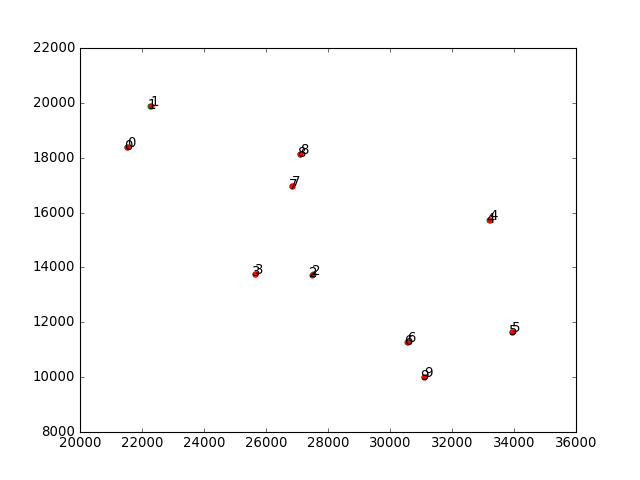

In [19]:
fig, ax = plt.subplots()
#plt.scatter(fl_glob[:,0], fl_glob[:,1],)
plt.scatter(imc_glob[:,0], imc_glob[:,1],color='green')
plt.scatter(xout[:,0], xout[:,1],color='red')

for i in range(imc_glob.shape[0]):
    #ax.annotate(str(i), (fl_glob[i,0],fl_glob[i,1]))
    ax.annotate(str(i), (imc_glob[i,0]-100,imc_glob[i,1]-100))
    ax.annotate(str(i), (xout[i,0],xout[i,1]))

In [20]:
box_edges = list()
box_edges.append(dat_boxes.loc[:,boxnb + xy])

tdat = dat_boxes.copy()
tdat[xy[0]] = dat_boxes[xy[0]] +dat_boxes[w]
box_edges.append(tdat.loc[:,boxnb + xy])
tdat[xy[1]] = dat_boxes[xy[1]] -dat_boxes[h]
box_edges.append(tdat.loc[:,boxnb + xy])
tdat = dat_boxes.copy()
tdat[xy[1]] = dat_boxes[xy[1]] -dat_boxes[h]
box_edges.append(tdat.loc[:,boxnb + xy])

all_boxpoints = pd.concat(box_edges)

In [21]:
all_boxpoints

,BoxNb,X,Y
0,1.0,2509.0,894.0
1,2.0,6075.0,1143.0
2,3.0,12195.0,7514.0
3,4.0,12464.0,5693.0
4,5.0,11003.0,6106.0
5,6.0,9111.0,5574.0
6,7.0,10172.0,4864.0
7,8.0,12819.0,4144.0
8,9.0,11496.0,4039.0
9,10.0,7114.0,1943.0


In [22]:
all_boxpoints.loc[:, xy] = if2imc(all_boxpoints.loc[:, xy])

In [23]:
all_boxpoints.sort_values(boxnb)

,BoxNb,X,Y
0,1.0,20998.013561,19778.334071
0,1.0,21610.048413,19765.603526
0,1.0,21622.714369,20334.398020
0,1.0,21010.471861,20347.080178
1,2.0,26172.416130,19344.915685
1,2.0,26188.949155,20006.748860
1,2.0,25633.084378,20018.282779
1,2.0,25616.770921,19356.500671
2,3.0,33343.025231,11433.934441
2,3.0,33327.146631,10893.351735


In [24]:
all_boxpoints.groupby(boxnb).agg(['min', 'max', lambda x: np.max(x)-np.min(x)])

X                                       Y                \
                min           max    <lambda>           min           max   
BoxNb                                                                       
1.0    20998.013561  21622.714369  624.700808  19765.603526  20347.080178   
2.0    25616.770921  26188.949155  572.178233  19344.915685  20018.282779   
3.0    33327.146631  33919.447191  592.300560  10880.615008  11433.934441   
4.0    33745.375604  34183.677136  438.301532  13239.727083  13638.994445   
5.0    31836.070469  32178.146125  342.075656  12746.505393  13116.102742   
6.0    29404.324766  29815.758873  411.434107  13489.412786  13956.793908   
7.0    30804.478531  31279.254652  474.776121  14381.233160  14723.047822   
8.0    34265.941567  34679.353828  413.412261  15246.193683  15787.755232   
9.0    32552.387822  32972.901064  420.513242  15419.561035  15828.364870   
10.0   26939.192425  27281.165771  341.973346  18275.934408  18610.806487   
11.0   22781.793663  23354.619526  572.825863  18566.160289  19068.964807   
12.0   27871.666565  28292.680497  421.013931  13193.793077  13755.917236   
13.0   31531.769946  31922.660533  390.890587  11154.223208  11661.634792   
14.0   27447.636884  27859.909398  412.272514  14877.936581  15196.292987   
15.0   30600.558453  30947.613041  347.054587  16579.194299  16882.486714   
16.0   33796.446438  34210.204330  413.757892  15406.114628  15834.383874   
17.0   32417.855423  32947.904702  530.049278  17380.385237  17699.612041   
18.0   30242.897270  30587.619696  344.722427  13772.951678  14109.124192   
19.0   30017.512092  30378.215383  360.703291  11035.207940  11363.023517   
20.0   34363.523085  34659.212052  295.688967  12953.632220  13261.379481   
21.0   33746.207717  34062.640348  316.432631  16302.824866  16596.391729   
22.0   30275.627519  30577.186259  301.558739  17186.224930  17486.112611   
23.0   24470.153657  24791.638305  321.484648  18592.120193  18912.186108   
24.0   26280.701978  26614.724757  334.022779  13721.280902  14040.129701   
25.0   34011.282550  34408.204232  396.921682  11144.676805  11473.515564   
26.0   29612.342994  29929.180531  316.837537  14998.788459  15308.722649   
27.0   25139.638183  25456.474771  316.836588  17306.308459  17597.205967   
28.0   21384.192704  21888.492920  504.300215  18578.693353  19232.711977   
29.0   22320.277224  22710.039915  389.762691  19778.213323  20152.271973   
30.0   32988.468300  33282.358227  293.889927  12646.995601  12951.949578   
31.0   33369.963189  34066.497819  696.534630  14812.277518  15334.873851   
32.0   23485.664100  23826.210100  340.546001  19105.036436  19416.476381   
33.0   27995.788837  28356.267896  360.479059  18501.819462  19033.181376   
34.0   26676.836250  27081.628729  404.792479  14328.735494  14672.719549   
35.0   26909.473344  27256.157679  346.684335  13394.184910  13697.654950   
36.0   28692.190863  29028.821853  336.630990  15367.164295  15648.962574   

                   
         <lambda>  
BoxNb              
1.0    581.476652  
2.0    673.367094  
3.0    553.319433  
4.0    399.267362  
5.0    369.597349  
6.0    467.381122  
7.0    341.814662  
8.0    541.561549  
9.0    408.803835  
10.0   334.872079  
11.0   502.804517  
12.0   562.124159  
13.0   507.411584  
14.0   318.356406  
15.0   303.292415  
16.0   428.269246  
17.0   319.226804  
18.0   336.172514  
19.0   327.815577  
20.0   307.747261  
21.0   293.566862  
22.0   299.887680  
23.0   320.065915  
24.0   318.848799  
25.0   328.838759  
26.0   309.934191  
27.0   290.897509  
28.0   654.018625  
29.0   374.058650  
30.0   304.953977  
31.0   522.596333  
32.0   311.439945  
33.0   531.361914  
34.0   343.984055  
35.0   303.470040  
36.0   281.798278